# SENTIMENT ANALYSIS ON CUSTOMER REVIEWS
# USING TF-IDF VECTORIZATION AND LOGISTIC REGRESSION


In [ ]:

#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#  Step 2: Load the Dataset
df = pd.read_csv("Reviews.csv")  # Make sure this CSV is in your working directory
df = df[['Text', 'Score']]       # Select only the needed columns
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [3]:
#  Step 3: Preprocessing the Data
# Remove neutral reviews (Score = 3)
df = df[df['Score'] != 3]

# Create Sentiment labels: 1 = Positive (4, 5), 0 = Negative (1, 2)
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# Function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"\d+", "", text)      # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['clean_text'] = df['Text'].apply(clean_text)
df[['Text', 'clean_text', 'Sentiment']].head()

,Text,clean_text,Sentiment
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,0
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,1


In [4]:
#  Step 4: Split Data & TF-IDF Vectorization
X = df['clean_text']
y = df['Sentiment']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [5]:
#  Step 5: Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)


 Accuracy Score: 0.9373543927046585

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78     16379
           1       0.95      0.98      0.96     88784

    accuracy                           0.94    105163
   macro avg       0.90      0.85      0.87    105163
weighted avg       0.94      0.94      0.93    105163



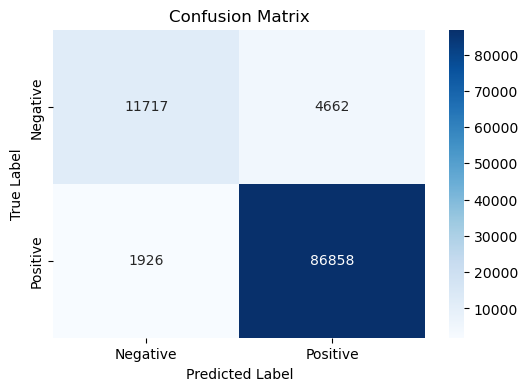

In [8]:
#  Step 6: Evaluate the Model
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
